## Task has been completed using my own Text Classification library.
1. It's goal is to automate prototyping of machine learning models including preprocessing steps.
2. I use it by defining a configuration, then running build, train & save process and then I evaluate the solution.
3. To run all the steps on your own, you will have to follow the instructions provided in README.md file.
4. I will leave the outputs in this notebook, so you can see just the results.

In [1]:
from text_clsf_lib.models.presets.preset_creation import create_preset
from text_clsf_lib.models.build_train_save import build_train_save
from text_clsf_lib.models.test_trained_model import test_single_model, test_multiple_models
from text_clsf_lib.predictors.predictor import Predictor
from text_clsf_lib.predictors.predictor_evaluations import deep_test_on_sample_lime
from text_clsf_lib.predictors.presets import create_predictor_preset
import pandas as pd
%matplotlib inline

In [2]:
data_df = pd.read_csv("data/Data_tweets.csv", engine="python", header=None)
data_df.columns = ['row_id', 'polarity', 'id', 'date', 'query', 'user', 'text']
data_df

,row_id,polarity,id,date,query,user,text
0,0,0,2068921155,Sun Jun 07 14:56:42 PDT 2009,NO_QUERY,smiley_sophie,my arm still hurts from when i pulled it yeste...
1,1,4,2065871668,Sun Jun 07 09:27:21 PDT 2009,NO_QUERY,ImmaChocoholic,I have so much to do outside! Been looking at ...
2,2,0,1835774749,Mon May 18 06:43:27 PDT 2009,NO_QUERY,drmomentum,"@AbsolutSara Yes, I knew about the clusterfark..."
3,3,0,1967121891,Fri May 29 19:00:46 PDT 2009,NO_QUERY,sweetsheilx,Just woke up and i feel relieved Haha now i ha...
4,4,4,1695846172,Mon May 04 07:04:29 PDT 2009,NO_QUERY,monmariej,LOVING the hot weather forecast for the rest o...
...,...,...,...,...,...,...,...
29995,29995,4,1989611723,Mon Jun 01 02:10:20 PDT 2009,NO_QUERY,danjwhite1,"@AaronRenfree be strong, You can do it! x"
29996,29996,0,2055276562,Sat Jun 06 09:01:28 PDT 2009,NO_QUERY,BethanyMcFlyX,@JessMcFlyxxx haha you ok? my tv has gone bloo...
29997,29997,0,2207484837,Wed Jun 17 08:00:01 PDT 2009,NO_QUERY,nicphillips83,Torrential rain + Take That fans traffic = bad...
29998,29998,4,2013485600,Tue Jun 02 22:47:33 PDT 2009,NO_QUERY,ghalya,"feels loved... ahhhhhhhhhhh &amp; now, i will ..."


In [3]:
data_df['polarity'].value_counts()

0    15049
4    14951
Name: polarity, dtype: int64

In [4]:
"""
Convert csv data to a format, that the library understands (json file).
Script also retrieves only 'polarity' and 'text' fields.
Since there are no 'neutral' tweets in the dataset, polarity is mapped to {0, 1} values,
where 0 means negative and 1 positive.
"""
!python3 -m scripts.prepare_twitter_data_for_library

### Preprocessing
---
- For all classifiers I used text preprocessing method targeted for social-media content from my library.
- It processes users, hashtags, numbers, links and other social-media related elements.

### Baseline solution
---
<p>For the baseline solution I will try architecture based on Multilayer Perceptron with TF-IDF as the vectorization method.</p>

In [5]:
# Baseline solution
tfidf_baseline = create_preset(model_name='tfidf_baseline',
                               preset_base='tfidf_feedforward',
                               vector_width=2000,
                               use_lowercase=True,
                               twitter_preprocessing=True,
                               X_name='text',
                               y_name='polarity',
                               data_path='data/data_tweets.json',
                               test_size=0.2,
                               use_cache=True,
                               epochs=4,
                               lr=0.003,
                               hidden_layers_list=[
                                     "dense 64 relu",
                                     "dropout1d 0.3",
                                     "dense 64 relu",
                                     "dropout1d 0.3",
                                     "dense softmax 2"])

In [6]:
# Build train and save TF-IDF model.
build_train_save(tfidf_baseline)

Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Cache data saved to _models/tfidf_baseline/_cache/cache_data.pickle
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                128064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_____________

Retrieving data from cache...


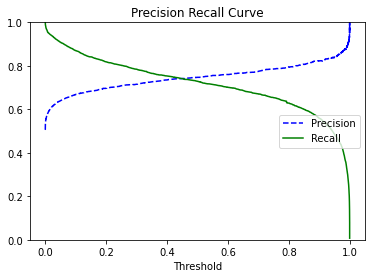

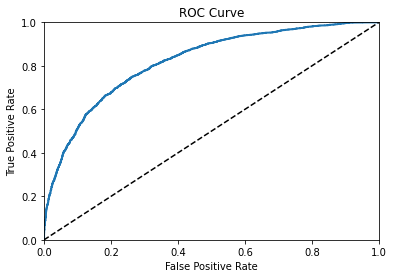

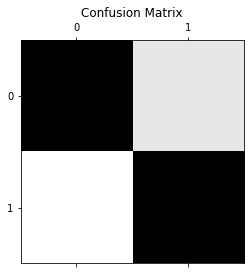

Showing metrics for model: tfidf_baseline
Scikit-Learn Classification Report on provided test corpus
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      3010
           1       0.75      0.73      0.74      2990

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



(array([[7.3664325e-01, 2.6335678e-01],
        [9.0716577e-01, 9.2834294e-02],
        [1.4086944e-01, 8.5913050e-01],
        ...,
        [8.0518121e-01, 1.9481882e-01],
        [7.5823373e-06, 9.9999237e-01],
        [9.9039137e-01, 9.6086403e-03]], dtype=float32),
 array([0, 1, 0, ..., 0, 1, 0]))

In [7]:
# Evaluate and visualize TF-IDF.
test_single_model(tfidf_baseline,
                  plot_precision_recall=True,
                  plot_roc_curve=True,
                  plot_conf_matrix=True)

In [8]:
# BiLSTM solution based on BPE Subword Tokenization
bpe_bilstm = create_preset(model_name='bpe_bilstm',
                           preset_base='bpe_rnn',
                           max_seq_len=200,
                           embedding_dim=50,
                           max_vocab_size=10000,
                           use_lowercase=True,
                           twitter_preprocessing=True,
                           X_name='text',
                           y_name='polarity',
                           data_path='data/data_tweets.json',
                           test_size=0.2,
                           use_cache=True,
                           epochs=3,
                           lr=0.004,
                           hidden_layers_list=[
                                     "bidirectional lstm 100 return_sequences tanh",
                                     "globalmaxpooling1d",
                                     "dense relu 50",
                                     "dropout1d 0.2",
                                     "dense softmax 2"])

### BPE - BiLSTM classifier
---

In [9]:
# Build train and save BPE Bi-LSTM model.
build_train_save(bpe_bilstm)

Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Max len: 237
Max len: 167
Cache data saved to _models/bpe_bilstm/_cache/cache_data.pickle
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           500050    
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 200)          120800    
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                

Retrieving data from cache...


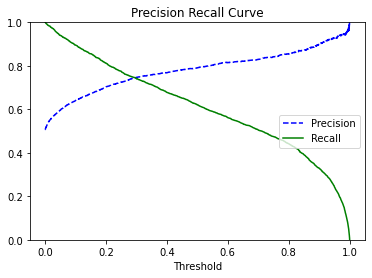

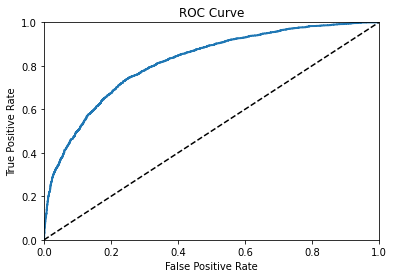

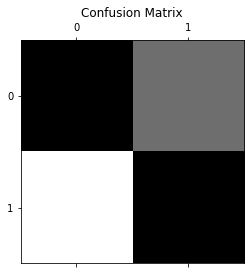

Showing metrics for model: bpe_bilstm
Scikit-Learn Classification Report on provided test corpus
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      3010
           1       0.79      0.62      0.70      2990

    accuracy                           0.73      6000
   macro avg       0.74      0.73      0.73      6000
weighted avg       0.74      0.73      0.73      6000



(array([[0.70356613, 0.29643387],
        [0.04363183, 0.95636815],
        [0.7774957 , 0.22250429],
        ...,
        [0.7905274 , 0.20947263],
        [0.69492865, 0.30507135],
        [0.99438715, 0.00561292]], dtype=float32),
 array([0, 1, 0, ..., 0, 1, 0]))

In [10]:
# Evaluate and visualize BPE Bi-LSTM.
test_single_model(bpe_bilstm)

### GloVe Twitter - BiLSTM classifier
---

In [11]:
# BiLSTM solution based on GloVe Twitter pre-trained embeddings.
glove_bilstm = create_preset(model_name='glove_bilstm',
                             preset_base='glove_rnn',
                             max_seq_len=200,
                             embedding_dim=50,
                             max_vocab_size=10000,
                             use_lowercase=True,
                             twitter_preprocessing=True,
                             X_name='text',
                             y_name='polarity',
                             embedding_type='glove_twitter',
                             data_path='data/data_tweets.json',
                             test_size=0.2,
                             use_cache=True,
                             epochs=3,
                             lr=0.004,
                             hidden_layers_list=[
                                     "bidirectional lstm 100 return_sequences tanh",
                                     "globalmaxpooling1d",
                                     "dense relu 50",
                                     "dropout1d 0.2",
                                     "dense softmax 2"])

In [12]:
# Build train and save GloVe-twitter Bi-LSTM model.
build_train_save(glove_bilstm)

Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Loading pre-trained GloVe word vectors from text_clsf_lib/preprocessing/vectorization/resources/embeddings/glove/twitter/50d.txt.
Found 1193515 vectors.
Filling pre-trained embeddings.
Cache data saved to _models/glove_bilstm/_cache/cache_data.pickle
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 200)          120800    
_________________________________________________________________
global_max_pooling1d_1 (Gl

Retrieving data from cache...


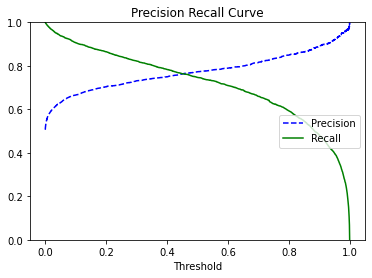

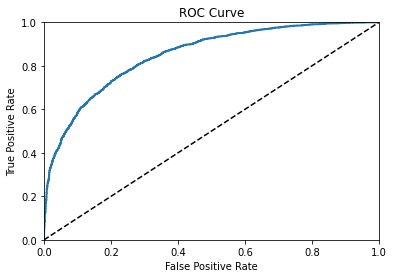

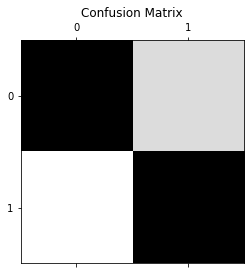

Showing metrics for model: glove_bilstm
Scikit-Learn Classification Report on provided test corpus
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3010
           1       0.77      0.75      0.76      2990

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000



(array([[1.5540858e-01, 8.4459144e-01],
        [3.2634610e-01, 6.7365384e-01],
        [5.8363545e-01, 4.1636455e-01],
        ...,
        [6.4712864e-01, 3.5287139e-01],
        [3.1176014e-04, 9.9968827e-01],
        [9.9957067e-01, 4.2933266e-04]], dtype=float32),
 array([0, 1, 0, ..., 0, 1, 0]))

In [13]:
# Evaluate and visualize GloVe-twitter Bi-LSTM.
test_single_model(glove_bilstm, plot_precision_recall=True,
                 plot_roc_curve=True,
                 plot_conf_matrix=True)

### Comparison of the results of the prepared solutions
---

Retrieving data from cache...
Retrieving data from cache...
Retrieving data from cache...


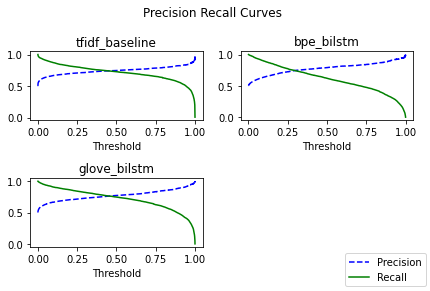

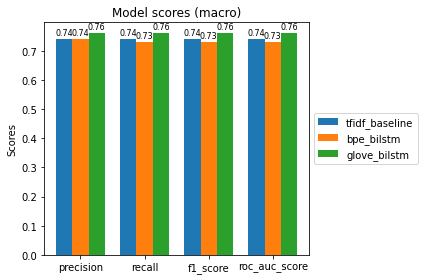

{'tfidf_baseline': {'precision': 0.7421353464521716,
  'recall': 0.7419571328570318,
  'f1_score': 0.7419393270684529,
  'roc_auc_score': 0.7419571328570317,
  'confusion_matrix': array([[2272,  738],
         [ 810, 2180]])},
 'bpe_bilstm': {'precision': 0.739833577319002,
  'recall': 0.7284730941454904,
  'f1_score': 0.7254813925061819,
  'roc_auc_score': 0.7284730941454904,
  'confusion_matrix': array([[2518,  492],
         [1135, 1855]])},
 'glove_bilstm': {'precision': 0.7648008456910844,
  'recall': 0.7644412715696841,
  'f1_score': 0.764404184490698,
  'roc_auc_score': 0.7644412715696841,
  'confusion_matrix': array([[2354,  656],
         [ 757, 2233]])}}

In [16]:
# Visualize comparison between created models.
test_multiple_models(presets=[tfidf_baseline, bpe_bilstm, glove_bilstm],
                     plot_precision_recall=True,
                     plot_roc_curve=False,
                     plot_conf_matrix=False,
                     plot_model_metrics=True)

In [17]:
# Create Predictor on top of the best created model and check, if it uses correct features for its decision.
glove_predictor_preset = create_predictor_preset('glove_bilstm')
glove_predictor = Predictor(glove_predictor_preset)

In [21]:
"""
This function returns words and their impacts on the model decision.
Values close to 1 mean positive correlation with the currently checked class.
Values close to -1 mean negative correlation with the currently checked class.
Values close to 0 mean no correlation.
"""
positive_text_test = 'I love the today\'s weather!'
deep_test_on_sample_lime(predictor=glove_predictor,
                         text=positive_text_test,
                         labels_to_explain=[1],
                         true_label=1)

/Users/dawidbrzozowski/Projects/sentiment_analysis/env/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Explaining text: I love the today's weather!
Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Model prediction: [[0.09413025 0.9058698 ]]
True label: 1
Explanation for label: 1
('love', 0.7590140717280397)
('weather', -0.19478973910891065)
('I', -0.10847385856304022)
('the', 0.08247791641453874)
('today', -0.06098516072220861)
('s', -0.027512585784923726)


In [19]:
negative_text_test = 'I heard you are sick. Hope you feel better soon!'
deep_test_on_sample_lime(predictor=glove_predictor,
                         text=negative_text_test,
                         labels_to_explain=[1],
                         true_label=1)

/Users/dawidbrzozowski/Projects/sentiment_analysis/env/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Explaining text: I heard you are sick. Hope you feel better soon!
Started data cleaning...
Twitter data cleaning...
Lowercasing...
Data cleaning finished!
Model prediction: [[0.9480709  0.05192914]]
True label: 1
Explanation for label: 1
('sick', -0.33816892921223685)
('feel', -0.23377650618494764)
('you', 0.08972408070843252)
('I', -0.06478742446756877)
('better', 0.059801878447425856)
('soon', 0.019423703226797175)
('heard', -0.016491577791272062)
('are', -0.01123626822812819)
('Hope', 0.011169923933149478)
